# Valenspy workflow

A basic but complete Valenspy workflow.

The goal of this workflow is to illustrate the full pipeline of a Valenspy workflow. 
We will create a bias map of the mean daily temperature in Belgium in July 2018.

For this, we will use an ALARO model simulations and the CLIMATE_GRID observational reference data. 

### 0. Loading packages

We start at the very beginning: by importing the valenspy python package

In [38]:
import valenspy as vp
from pathlib import Path
import xarray as xr
from matplotlib import pyplot as plt

## 1. Input
Then we'll load input data for both the simulation and the reference data. 

For this, we need the valenspy **InputManager**. See notebook [2 Input](2_input.ipynb) for more detailed information.

In [3]:
machine = 'hortense' # define the machine name

manager = vp.InputManager(machine=machine) #Create the input manager

### 1.1 Climate grid data

We load in the climate grid data and the ERA5 data.

In [4]:
ds_clm_grid = manager.load_data("CLIMATE_GRID", variables=["pr","tas"], path_identifiers=["latlon_5km"])
ds_clm_grid

File paths found:
/dodrio/scratch/projects/2022_200/external/climate_grid/regridded/latlon_5km/PRECIP_QUANTITY_CLIMATE_GRID_1951_2023_daily_latlon_5km.nc
/dodrio/scratch/projects/2022_200/external/climate_grid/regridded/latlon_5km/TEMP_AVG_CLIMATE_GRID_1954_2023_daily_latlon_5km.nc
The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['pr', 'tas']


<xarray.Dataset> Size: 2GB
Dimensions:  (time: 26663, lon: 75, lat: 70)
Coordinates:
  * time     (time) datetime64[ns] 213kB 1951-01-01 1951-01-02 ... 2023-12-31
  * lon      (lon) float64 600B 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat      (lat) float64 560B 49.0 49.05 49.09 49.13 ... 52.02 52.06 52.1
Data variables:
    pr       (time, lat, lon) float64 1GB dask.array<chunksize=(13704, 34, 36), meta=np.ndarray>
    tas      (time, lat, lon) float64 1GB dask.array<chunksize=(12783, 34, 37), meta=np.ndarray>
Attributes:
    CDI:               Climate Data Interface version 1.9.9 (https://mpimet.m...
    Conventions:       CF-1.6
    creation_date:     25-06-2024
    creators:          Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:           inne.vanderkelen@meteo.be
    version:           1.1
    affiliation:       Royal Meteorological Institute of Belgium
    projection:        +proj=lcc +lat_2=50.569898649999999 +lat_1=50.56989864...
    history:           Tue Jun 25 14:36:40 2024: cdo remapcon,latlon_5km.txt ...
    CDO:               Climate Data Operators version 1.9.9 (https://mpimet.m...
    path_identifiers:  ['latlon_5km']
    dataset:           CLIMATE_GRID

### 1.2 ERA5 data
We load in the ERA5 data.

In [30]:
ds_ERA5 = manager.load_data("ERA5", variables=["pr","tas"], period=[2018], freq="hourly")
ds_ERA5

File paths found:
/dodrio/scratch/projects/2022_200/external/era5/europe/2m_temperature/hourly/era5-hourly-europe-2m_temperature-2018.nc
/dodrio/scratch/projects/2022_200/external/era5/europe/total_precipitation/hourly/era5-hourly-europe-total_precipitation-2018.nc
The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas', 'pr']


<xarray.Dataset> Size: 7GB
Dimensions:  (lon: 289, lat: 163, time: 8760)
Coordinates:
  * lon      (lon) float32 1kB -27.0 -26.75 -26.5 -26.25 ... 44.5 44.75 45.0
  * lat      (lat) float32 652B 33.0 33.25 33.5 33.75 ... 72.75 73.0 73.25 73.5
  * time     (time) datetime64[ns] 70kB 2018-01-01 ... 2018-12-31T23:00:00
Data variables:
    tas      (time, lat, lon) float64 3GB dask.array<chunksize=(3024, 54, 96), meta=np.ndarray>
    pr       (time, lat, lon) float64 3GB dask.array<chunksize=(3024, 54, 96), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.6
    history:           2020-02-19 07:13:05 GMT by grib_to_netcdf-2.16.0: /opt...
    path_identifiers:  ['latlon_5km']
    dataset:           ERA5
    period:            2018
    freq:              hourly

### 1.3 ALARO Model data
We load in the ALARO model data. Here we don't use the manager as this data does not have a fixed location.

In [12]:
ic = vp.INPUT_CONVERTORS["ALARO_K"]
path = Path("/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc44757_Nicolas/run_ALARO_sfx/out/netcdf/EXAMPLE_ERA5_25_12_ALARO_EUROCORDEX_20240802/output/20060601_20060630/")
files = list(path.glob('**/*.nc'))
ds_ALARO = ic.convert_input(files)
ds_ALARO

Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
24.14% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['clt', 'tas', 'ts', 'uas', 'vas', 'sfcWind', 'pr']
Unknown to ValEnsPy: ['longitude_bnds', 'latitude_bnds', 'Lambert_Conformal', 'ground_heat_flux', 'latent_heat_flux', 'latent_heat_flux_transp', 'net_radiation', 'rain_convective', 'rain_stratiform', 'relativehumidity_2m_atm', 'relativehumidity_2m_sfx', 'roughness_length_momentum', 'sensible_heat_flux', 'snow_convective', 'snow_stratiform', 'soil_moisture_mid', 'soil_moisture_top', 'soil_temperature_bot', 'soil_temperature_top', 'specifichumidity_2m_atm', 'surface_pressure', 'temperature_2m_sfx']


<xarray.Dataset> Size: 31GB
Dimensions:                    (time: 720, y: 499, x: 499, x_2: 4)
Coordinates:
  * time                       (time) datetime64[ns] 6kB 2006-06-01T01:00:00 ...
    longitude                  (y, x) float64 2MB dask.array<chunksize=(499, 499), meta=np.ndarray>
    latitude                   (y, x) float64 2MB dask.array<chunksize=(499, 499), meta=np.ndarray>
  * x                          (x) float64 4kB -3.112e+06 -3.1e+06 ... 3.112e+06
  * y                          (y) float64 4kB 2.986e+06 2.999e+06 ... 9.211e+06
    year_month                 (time) int64 6kB 200606 200606 ... 200606 200607
Dimensions without coordinates: x_2
Data variables: (12/29)
    longitude_bnds             (time, y, x, x_2) float64 6GB dask.array<chunksize=(24, 499, 499, 4), meta=np.ndarray>
    latitude_bnds              (time, y, x, x_2) float64 6GB dask.array<chunksize=(24, 499, 499, 4), meta=np.ndarray>
    Lambert_Conformal          (time) |S1 720B b'' b'' b'' b'' ... b'' b'' b''
    clt                        (time, y, x) float32 717MB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    ground_heat_flux           (time, y, x) float32 717MB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    latent_heat_flux           (time, y, x) float32 717MB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    ...                         ...
    temperature_2m_sfx         (time, y, x) float32 717MB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    ts                         (time, y, x) float32 717MB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    uas                        (time, y, x) float32 717MB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    vas                        (time, y, x) float32 717MB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    sfcWind                    (time, y, x) float32 717MB dask.array<chunksize=(24, 499, 499), meta=np.ndarray>
    pr                         (time, y, x) float64 1GB dask.array<chunksize=(11, 499, 499), meta=np.ndarray>
Attributes: (12/23)
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    basedate:     2006-06-01
    validate:     2006-06-01 01:00:00
    leadtime:     1
    timestep:     300
    ...           ...
    ey:           13
    center_lon:   9.9
    center_lat:   49
    history:      Wed Aug 07 13:43:33 2024: cdo mergetime /dodrio/scratch/pro...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...
    dataset:      ALARO-SFX_K

To get a feel how this data looks like, we can select and plot the first timestep

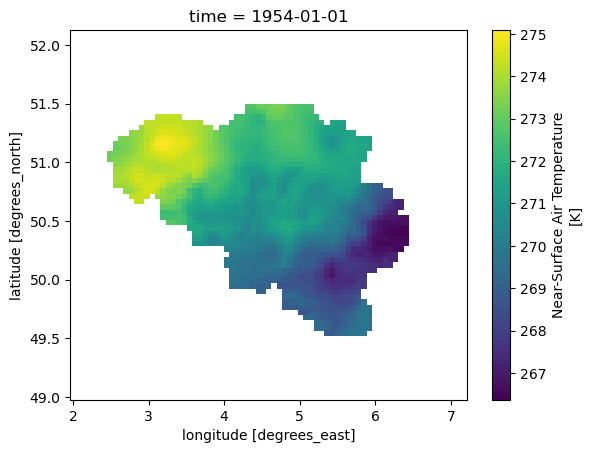

In [24]:
da_ref.isel(time=0).plot()

## 2. Processing

We eventually want a bias map of the mean temperature in July 2018. For this, processing steps need to happen. 

Several options are possible: 
- selecting a domain and/or time period
- resampling
- regridding 
- Point selection

Some of these can be done with standard xarray functions, others are implemented in the valenspy package to simplify the workflow. See notebook [3 Processing](3_processing.ipynb) for more detailed information.

#### 2.1 Selecting a time period

In [31]:
ds_clm_grid = ds_clm_grid.sel(time='07-2018') #Select the month of July 2018
ds_ERA5 = ds_ERA5.sel(time='07-2018') #Select the month of July 2018

ds_clm_grid.time

<xarray.DataArray 'time' (time: 31)> Size: 248B
array(['2018-07-01T00:00:00.000000000', '2018-07-02T00:00:00.000000000',
       '2018-07-03T00:00:00.000000000', '2018-07-04T00:00:00.000000000',
       '2018-07-05T00:00:00.000000000', '2018-07-06T00:00:00.000000000',
       '2018-07-07T00:00:00.000000000', '2018-07-08T00:00:00.000000000',
       '2018-07-09T00:00:00.000000000', '2018-07-10T00:00:00.000000000',
       '2018-07-11T00:00:00.000000000', '2018-07-12T00:00:00.000000000',
       '2018-07-13T00:00:00.000000000', '2018-07-14T00:00:00.000000000',
       '2018-07-15T00:00:00.000000000', '2018-07-16T00:00:00.000000000',
       '2018-07-17T00:00:00.000000000', '2018-07-18T00:00:00.000000000',
       '2018-07-19T00:00:00.000000000', '2018-07-20T00:00:00.000000000',
       '2018-07-21T00:00:00.000000000', '2018-07-22T00:00:00.000000000',
       '2018-07-23T00:00:00.000000000', '2018-07-24T00:00:00.000000000',
       '2018-07-25T00:00:00.000000000', '2018-07-26T00:00:00.000000000',
       '2018-07-27T00:00:00.000000000', '2018-07-28T00:00:00.000000000',
       '2018-07-29T00:00:00.000000000', '2018-07-30T00:00:00.000000000',
       '2018-07-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 248B 2018-07-01 2018-07-02 ... 2018-07-31
Attributes:
    standard_name:  time
    axis:           T

#### 2.2 Resampling to the same frequency
The ERA5 data is hourly while the CLIMATE_GRID data is daily. We resample the ERA5 data to daily data.

In [34]:
ds_ERA5_tas = ds_ERA5.tas.resample(time='1D').mean() #Resample the data to daily values
ds_ERA5_pr = ds_ERA5.pr.resample(time='1D').sum() #Resample the data to daily values
ds_ERA5_daily = xr.merge([ds_ERA5_tas, ds_ERA5_pr])
ds_ERA5_daily

#### 2.3 Regridding
The data is not on the same grid!

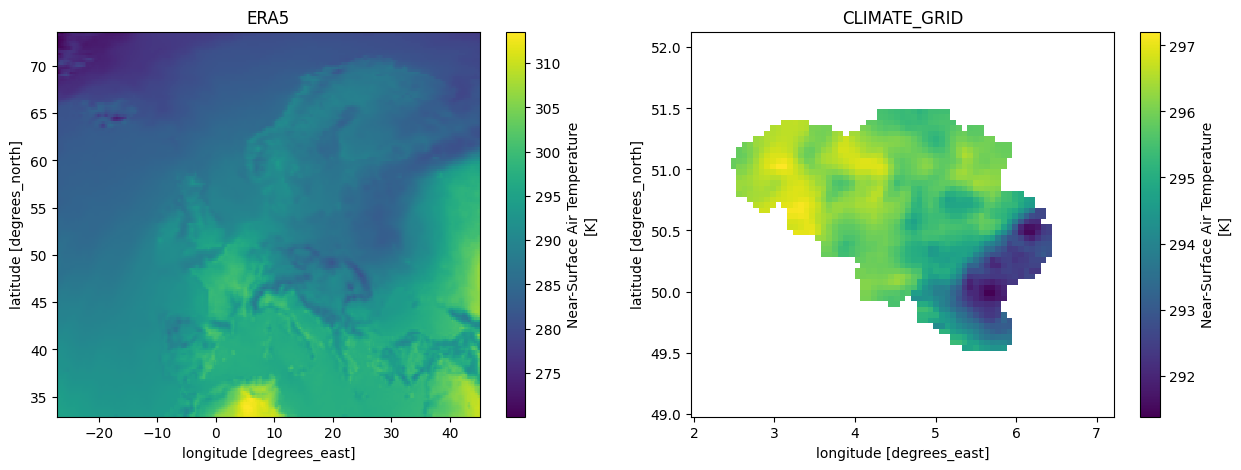

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ds_ERA5_daily.sel(time='2018-07-01').tas.plot(ax=ax[0])
ds_clm_grid.tas.isel(time=0).plot(ax=ax[1])
ax[0].set_title("ERA5")
ax[1].set_title("CLIMATE_GRID")
plt.show()

So we have to regrid it!

In [54]:
gridfile = manager._get_file_paths("CLIMATE_GRID", variables=["pr","tas"], path_identifiers=["latlon_5km"])[0]
ds_ERA5_daily = vp.remap_cdo(gridfile, ds_ERA5_daily, remap_method="con") #Remapping the ERA5 data to the CLIMATE_GRID grid - NOTE this uses CDO

#### 2.3 Selecting the domain
Ok now we would like to ensure that the data is on the same domain.

In [47]:
# Mask the ERA5 data with the CLIMATE_GRID by selecting only those values
ds_ERA5_daily = ds_ERA5_daily.where(ds_clm_grid.tas.notnull())

And now it is on the same grid and domain!

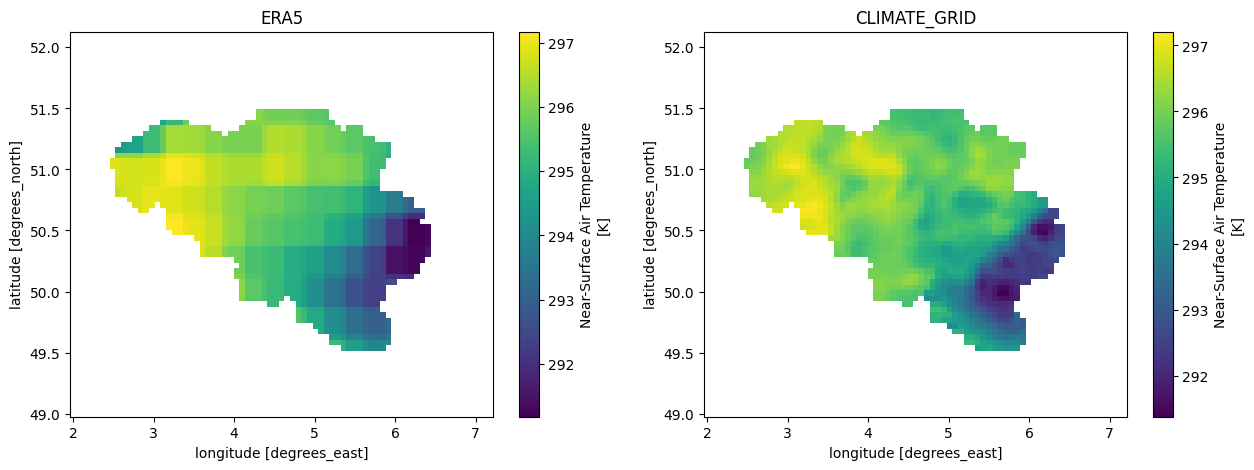

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ds_ERA5_daily.sel(time='2018-07-01').tas.plot(ax=ax[0])
ds_clm_grid.tas.isel(time=0).plot(ax=ax[1])
ax[0].set_title("ERA5")
ax[1].set_title("CLIMATE_GRID")
plt.show()

## 3. Diagnostic

Now we are ready for the actual diagnostic (fun part!).

Based on the processed datasets we can make several comparisons. Here we will make a Spatial bias map of the mean temperature in July 2018.

In [49]:
from valenspy.diagnostic import SpatialBias
print(SpatialBias.description)

Spatial Bias (Model2Ref)
The spatial bias of the data compared to the reference.
 Diagnostic function: spatial_bias
 Calculate the spatial bias of the data compared to the reference. The time dimensions are averaged over if present.

    Parameters
    ----------
    ds : xr.Dataset
        The data to calculate the spatial bias of.
    ref : xr.Dataset or xr.DataArray
        The reference data to compare the data to.
    calc_relative : bool, optional
        If True, return the relative bias, if False return the absolute bias, by default False

    Returns
    -------
    xr.Dataset or xr.DataArray
        The spatial bias of the data compared to the reference.
    
 Visualization function: plot_spatial_bias
 
    Plot the spatial bias of a given data array on a map.

    Parameters
    ----------
    da : xarray.DataArray
        The DataArray containing the bias data to be plotted. It is assumed that the data represents some
        form of spatial bias, and the plot will visualiz

This diagnostic object uses underlying functions to calculate the mean bias over the time dimension based on the two inputs. It returns a dataset with the resulting calculation. Let's check it out. 

In [52]:
ds_spatialbias = SpatialBias.apply(ds_clm_grid, ref=ds_ERA5_daily).compute() #As this is a dask array, nothing is computed until we call the compute method
ds_spatialbias

<xarray.Dataset> Size: 85kB
Dimensions:  (lon: 75, lat: 70)
Coordinates:
  * lon      (lon) float64 600B 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat      (lat) float64 560B 49.0 49.05 49.09 49.13 ... 52.02 52.06 52.1
Data variables:
    tas      (lat, lon) float64 42kB nan nan nan nan nan ... nan nan nan nan nan
    pr       (lat, lon) float64 42kB nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:               Climate Data Interface version 1.9.9 (https://mpimet.m...
    Conventions:       CF-1.6
    creation_date:     25-06-2024
    creators:          Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:           inne.vanderkelen@meteo.be
    version:           1.1
    affiliation:       Royal Meteorological Institute of Belgium
    projection:        +proj=lcc +lat_2=50.569898649999999 +lat_1=50.56989864...
    history:           Tue Jun 25 14:36:40 2024: cdo remapcon,latlon_5km.txt ...
    CDO:               Climate Data Operators version 1.9.9 (https://mpimet.m...
    path_identifiers:  ['latlon_5km']
    dataset:           CLIMATE_GRID

Note there is no time dimension anymore! As we have calculated the mean over the time dimension.

Each diagnostic has a predefined plot function. Let's use it to plot the bias map for the variable tas.

/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


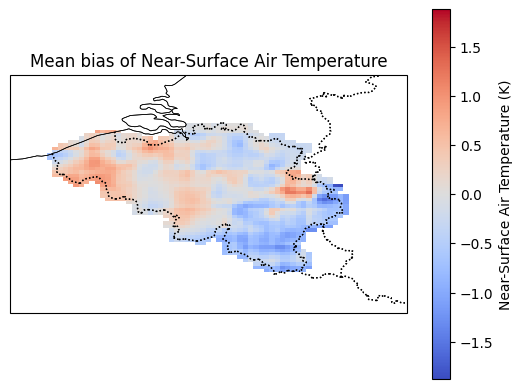

In [53]:
SpatialBias.plot(ds_spatialbias.tas)
plt.show()

Nice don't you think? It seems that the CLIMATE_GRID data is colder over the Ardennes and warmer over the coast, possibly the orography is better captured in the CLIMATE_GRID data as it is a higher resolution dataset!

Congrats, you reached the end of a basic valenspy workflow. In the following notebooks we will go into way more details on the functionalities of the different steps:
- [2 Input](2_input.ipynb)
- [3 Processing](3_processing.ipynb)
- [4_1 Biasmap diagnostic](4_1_diagnostic_biasmap.ipynb)
- [4_2 Skill score diagnostic](4_2_diagnostic_skillscores.ipynb)